In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier, VotingClassifier

In [3]:
df = pd.read_csv('input/bbc-text.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
print("shape of data frame", df.shape)
df.duplicated().sum()

shape of data frame (2225, 2)


99

In [6]:
df.drop_duplicates(inplace=True)
print("shape of data frame", df.shape)

shape of data frame (2126, 2)


In [7]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [8]:
df['category'].value_counts()

category
sport            504
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64

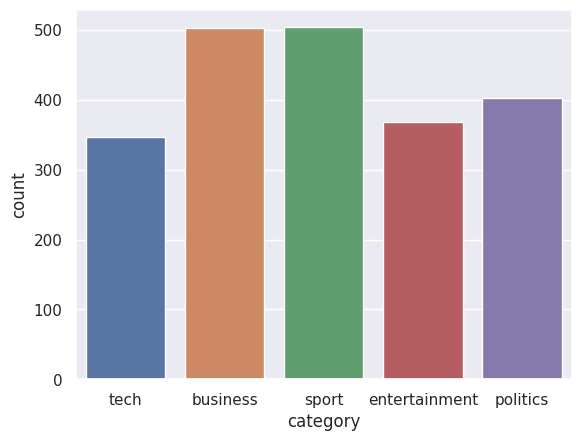

In [9]:
sns.set()
sns.countplot(df,x='category')
plt.show()

In [10]:
X_train, X_test, Y_train,Y_test = train_test_split(df['text'], df['category'],test_size=0.3,random_state=32)

In [11]:
print("train data shape",X_train.shape)
print("test data shape",X_test.shape)

train data shape (1488,)
test data shape (638,)


In [12]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['text'])
x_count_train = count_vectorizer.transform(X_train)
x_count_test = count_vectorizer.transform(X_test)

In [13]:
tfidf_word_vectorizer = TfidfVectorizer(analyzer='word',max_features=5000)
tfidf_word_vectorizer.fit(df['text'])
x_tfidf_word_train = tfidf_word_vectorizer.transform(X_train)
x_tfidf_word_test = tfidf_word_vectorizer.transform(X_test)

In [14]:
tfidf_ngram_vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(2,3),max_features=5000)
tfidf_ngram_vectorizer.fit(df['text'])
x_tfidf_ngram_train = tfidf_ngram_vectorizer.transform(X_train)
x_tfidf_ngram_test = tfidf_ngram_vectorizer.transform(X_test)

In [15]:
tfidf_char_vectorizer = TfidfVectorizer(analyzer='char',ngram_range=(2,3),max_features=5000)
tfidf_char_vectorizer.fit(df['text'])
x_tfidf_char_train = tfidf_char_vectorizer.transform(X_train)
x_tfidf_char_test = tfidf_char_vectorizer.transform(X_test)

In [16]:
hashing_vectorizer = HashingVectorizer(n_features=5000)
hashing_vectorizer.fit(df['text'])
x_hashing_train = hashing_vectorizer.transform(X_train)
x_hashing_test = hashing_vectorizer.transform(X_test)

In [17]:
encoder = LabelEncoder()
encoder.fit(df['category'])
Y_train_encoded = encoder.transform(Y_train)
Y_test_encoded = encoder.transform(Y_test)
encoder_mapping = dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
display(encoder_mapping)


{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}

In [18]:
word_trained_classifier = {}

In [19]:
def model_score(name, model, X_train, X_test, Y_train, Y_test, vectorization_method):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    word_trained_classifier[name] = fileName = f'models/example-2/{name}-{vectorization_method}.model'
    joblib.dump(model,filename=fileName)
    return accuracy_score(y_pred=Y_pred, y_true=Y_test)

In [20]:
logistic_regression = LogisticRegression(multi_class='auto', solver='lbfgs',max_iter=4000)
svm = SVC(kernel='sigmoid',gamma=0.1, probability=True)
multinomial_nb = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
bernoulli_nb = BernoulliNB()
gaussian_nb = GaussianNB()
decision_tree = DecisionTreeClassifier(max_depth = 5)
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier(n_estimators=50,random_state=2)
extra_trees = ExtraTreesClassifier(n_estimators=50,random_state=2)
adaboost = AdaBoostClassifier(n_estimators=50,random_state=2)
bagging = BaggingClassifier(n_estimators=50,random_state=2)
gradient_boost = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [21]:
classifiers = {
    'logistic_regression': logistic_regression,
    'svm': svm,
    'multinomial_nb': multinomial_nb,
    'bernoulli_nb': bernoulli_nb,
    'gaussian_nb': gaussian_nb,
    'decision_tree': decision_tree,
    'knn': knn,
    'random_forest': random_forest,
    'extra_trees': extra_trees,
    # 'adaboost': adaboost,
    # 'bagging': bagging,
    # 'gradient_boost': gradient_boost
}

classifiers

{'logistic_regression': LogisticRegression(max_iter=4000),
 'svm': SVC(gamma=0.1, kernel='sigmoid', probability=True),
 'multinomial_nb': Pipeline(steps=[('Normalizing', MinMaxScaler()),
                 ('MultinomialNB', MultinomialNB())]),
 'bernoulli_nb': BernoulliNB(),
 'gaussian_nb': GaussianNB(),
 'decision_tree': DecisionTreeClassifier(max_depth=5),
 'knn': KNeighborsClassifier(),
 'random_forest': RandomForestClassifier(n_estimators=50, random_state=2),
 'extra_trees': ExtraTreesClassifier(n_estimators=50, random_state=2)}

In [22]:
print("x count test",type(x_count_test))
print("x word test", type(x_tfidf_word_test))
print("x ngram test", type(x_tfidf_ngram_test))
print("x char test", type(x_tfidf_char_test))
print("x hashing test", type(x_hashing_test))
print("y_train", type(Y_train_encoded))

x count test <class 'scipy.sparse._csr.csr_matrix'>
x word test <class 'scipy.sparse._csr.csr_matrix'>
x ngram test <class 'scipy.sparse._csr.csr_matrix'>
x char test <class 'scipy.sparse._csr.csr_matrix'>
x hashing test <class 'scipy.sparse._csr.csr_matrix'>
y_train <class 'numpy.ndarray'>


In [23]:
x_count_train = x_count_train.toarray()
x_count_test = x_count_test.toarray()
x_tfidf_word_test = x_tfidf_word_test.toarray()
x_tfidf_word_train = x_tfidf_word_train.toarray()
x_tfidf_ngram_test = x_tfidf_ngram_test.toarray()
x_tfidf_ngram_train = x_tfidf_ngram_train.toarray()
x_tfidf_char_test = x_tfidf_char_test.toarray()
x_tfidf_char_train = x_tfidf_char_train.toarray()
x_hashing_test = x_hashing_test.toarray()
x_hashing_train = x_hashing_train.toarray()

In [24]:
print("x count test",type(x_count_test))
print("x word test", type(x_tfidf_word_test))
print("x ngram test", type(x_tfidf_ngram_test))
print("x char test", type(x_tfidf_char_test))
print("x hashing test", type(x_hashing_test))
print("y_train", type(Y_train_encoded))

x count test <class 'numpy.ndarray'>
x word test <class 'numpy.ndarray'>
x ngram test <class 'numpy.ndarray'>
x char test <class 'numpy.ndarray'>
x hashing test <class 'numpy.ndarray'>
y_train <class 'numpy.ndarray'>


In [26]:
count_accuracy = {}
word_accuracy = {}
ngram_accuracy = {}
char_accuracy = {}
hashing_accuracy = {}

for name, classifier in classifiers.items():
    # count_acc = model_score(name, classifier, x_count_train, x_count_test, Y_train_encoded,Y_test_encoded, 'count')
    word_acc = model_score(name, classifier, x_tfidf_word_train, x_tfidf_word_test, Y_train_encoded,Y_test_encoded, 'word')
    # ngram_acc = model_score(name, classifier, x_tfidf_ngram_train, x_tfidf_ngram_test, Y_train_encoded,Y_test_encoded, 'ngram')
    # char_acc = model_score(name, classifier, x_tfidf_char_train, x_tfidf_char_test, Y_train_encoded,Y_test_encoded, 'char')
    # hashing_acc = model_score(name, classifier, x_hashing_train, x_hashing_test, Y_train_encoded,Y_test_encoded, 'hashing')

    print(f'{name} is trained with word accuracy: {word_acc}\n\n')
    # count_accuracy[name] = count_acc
    word_accuracy[name] = word_acc
    # ngram_accuracy[name] = ngram_acc
    # char_accuracy[name] = char_acc
    # hashing_accuracy[name] = hashing_acc


logistic_regression is trained with word accuracy: 0.9780564263322884


svm is trained with word accuracy: 0.9278996865203761


multinomial_nb is trained with word accuracy: 0.9639498432601881


bernoulli_nb is trained with word accuracy: 0.9592476489028213


gaussian_nb is trained with word accuracy: 0.9231974921630094


decision_tree is trained with word accuracy: 0.6880877742946708


knn is trained with word accuracy: 0.9373040752351097


random_forest is trained with word accuracy: 0.9467084639498433


extra_trees is trained with word accuracy: 0.9545454545454546




In [27]:
# count_accuracy

In [28]:
word_accuracy

{'logistic_regression': 0.9780564263322884,
 'svm': 0.9278996865203761,
 'multinomial_nb': 0.9639498432601881,
 'bernoulli_nb': 0.9592476489028213,
 'gaussian_nb': 0.9231974921630094,
 'decision_tree': 0.6880877742946708,
 'knn': 0.9373040752351097,
 'random_forest': 0.9467084639498433,
 'extra_trees': 0.9545454545454546}

In [29]:
# ngram_accuracy

In [30]:
# char_accuracy

In [31]:
# hashing_accuracy

In [32]:
word_trained_classifier

{'logistic_regression': 'models/example-2/logistic_regression-word.model',
 'svm': 'models/example-2/svm-word.model',
 'multinomial_nb': 'models/example-2/multinomial_nb-word.model',
 'bernoulli_nb': 'models/example-2/bernoulli_nb-word.model',
 'gaussian_nb': 'models/example-2/gaussian_nb-word.model',
 'decision_tree': 'models/example-2/decision_tree-word.model',
 'knn': 'models/example-2/knn-word.model',
 'random_forest': 'models/example-2/random_forest-word.model',
 'extra_trees': 'models/example-2/extra_trees-word.model'}

In [33]:
def test(s: str, category: str):
    df_x_test = pd.DataFrame([s],columns=['text'])
    df_y_test = pd.Series([category], name='category')

    vectorized_x_test = tfidf_word_vectorizer.transform(df_x_test).toarray()
    encoded_y_test = encoder.transform(df_y_test)
    display(f"expected class: {encoder_mapping[encoded_y_test[0]]}")
    for name, modelFile in word_trained_classifier.items():
        model = joblib.load(modelFile)
        encoded_y_pred = model.predict(vectorized_x_test)
        probabilities = model.predict_proba(vectorized_x_test)
        display(f'model {name}: predict class: {encoder_mapping[encoded_y_pred[0]]}')
        display(f'confidence values: {probabilities}')
        print('\n')

In [34]:
test(s='podcasters  look to net money nasa is doing it  14-year-old boys in bedrooms are doing it  couples are doing it  gadget lovers - male and female - are definitely doing it.  it is podcasting - diy radio in the form of downloadable mp3 audio files. they can done by anyone who has a microphone  simple software  the net  and something to say. some liken them to talking  audioblogs  because many complement text-based weblogs - diary-like sites where people share their thoughts. they are essentially amateur radio shows on the net  on demand  and the  movement  is at very early stages.  it s about real people saying real things and communicating   says adam curry  former mtv vj and the pied piper of podcasting. he was one of a community of people who created ipodder  a small computer program  known as an  aggregator .  it collects and automatically sends mp3 files to any digital music-playing device that can play wmp formats. those with digital music players can select which podcasts they like  and subscribe - for free - to that show s  feed . when a new podcast is available  it is automatically sent to the device when connected to a computer.  it is totally going to kill the business model of radio   thinks curry.  i just did a tour of madison avenue where all the big brands and advertising agencies of the world are   he says.  and they are scared to death of the next generation - like my daughter who is 14 - who don t listen to radio.  they are on msn  they ve got their ipod  their mp3 player  they ve got their xbox - they are not listening to radio.  so how are they going to reach these audiences   it is the distribution that is changing and the barriers are being brought down so everyone can be part of it.   it is a fledgling movement  but it is gaining momentum now that people have started thinking about how to make a business from it. ian fogg  jupiter research analyst  thinks there could be potential for business  but it could take an interesting turn if big companies  like apple and microsoft  get involved.  it is a nascent area but quite exciting. it is yet another area that demonstrates the move to a digital lifestyle and digital home is not over   he says.   podcasting is one of those interesting areas that bridges what you do at home and what you do out and about - a classic hybrid. it is another aspect of the  time-shifting  of content - the latest industry buzzword for being able to listen to what you want  when  and wherever you want. audiences are in the 10s  100s  and 1 000s rather than millions. more than 4 300 podcasts are currently listed. curry s daily source code - which he committed to doing daily to inspire the community - has 10s of thousands of listeners.  but dave winer is doubtful. he designed the format called rss (really simple syndication)  which gives web users an easy way to keep updated automatically on sites they like. podcasts rely on his technology because it is the way they are distributed. he is also writer of the longest-running weblog on the net  scripting news. he thinks its power lies in its democratising potential  not in its  over-hyped  business promise.   we re the sources  the people doing stuff  and podcasting is a way to tell people who care what we re doing.  no matter how you look at it  commercialising this medium isn t going to make very much money   he says.  podcasting is going to be a medium of niches  with  audiences  measured in the single digits  like e-mail or blogs.  maybe in a few years  maybe six or seven digits. but it will have to sustain interest beyond the hype balloon.  curry and associate ron bloom s new venture  called podshow  is to help ordinary people produce  post  distribute and market their podcasts. because of the way podcasts work  based on rss  the latest podcasts which people can select mean that they are ready-made targets.  when you look at podcasting - wow this is a pretty interesting audience. the audience is pre-selected. they have decided to subscribe to your program   explains curry. advertising  in his eyes  can be tailored to podcasts  to make it more imaginative and unobtrusive.  how i believe this will work  is to create a network that  in aggregation  will have enough numbers to support a return on investment for the advertisers and for the podcasters.  i have 50  60  70 000 listeners. i could make a couple of bucks off that  but not much. if you are talking a million podcasters  and then you can kind of divide that amongst ourselves  then that is kind of interesting.  essentially  he says  if you are doing a bass fishing podcast  someone who is selling bait and tackle will probably want to advertise on your show. he is clear the ads will not be the traditional  in-your-face  type familiar to commercial radio now.  we are really going to see these microcosms and commerce will be all over the place.   it is happening already. coffee-loving curry has sold $4 000 worth of coffee machines through a referral link to amazon from his site.  others use in-show promotions  like the dawn and drew show. one  eric rice  has won sponsorship from warner bros. he can now legally play the music of a band warner bros wants to push. some commentators on the net say it has a similar feel to the dotcom days. others say it is just another element of setting media free from big companies and letting people be creative. one thing is for sure; they are not about to disappear in a hurry. the creative forces behind radio are elated  says curry. for now  he tunes out the negative comments within the podcasting community.  i should be knighted for this   he adds  with a wry chuckle   people are going to be so happy to sit at home  make their podcast  and make a little money', category='tech')

'expected class: tech'

'model logistic_regression: predict class: sport'

'confidence values: [[0.25357706 0.1825488  0.08124394 0.30832634 0.17430385]]'

'model svm: predict class: sport'

'confidence values: [[0.25338786 0.24358166 0.0083467  0.27080089 0.2238829 ]]'

'model multinomial_nb: predict class: tech'

'confidence values: [[0.00165757 0.01478736 0.00794666 0.00128589 0.97432253]]'

'model bernoulli_nb: predict class: entertainment'

'confidence values: [[1.13058726e-06 9.99811336e-01 7.21979025e-33 1.87533592e-04\n  6.22417822e-40]]'

'model gaussian_nb: predict class: tech'

'confidence values: [[0. 0. 0. 0. 1.]]'

'model decision_tree: predict class: sport'

'confidence values: [[0.07925408 0.09090909 0.03263403 0.73426573 0.06293706]]'

'model knn: predict class: tech'

'confidence values: [[0.  0.2 0.  0.  0.8]]'

'model random_forest: predict class: sport'

'confidence values: [[0.16 0.22 0.08 0.52 0.02]]'

'model extra_trees: predict class: sport'

'confidence values: [[0.16 0.26 0.04 0.52 0.02]]'